In [150]:
# Import Librarirs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [151]:
# Load the dataset
fb=pd.read_csv(r"C:\Users\shaws\OneDrive\Desktop\Football Strategy\Football-Scenarios-DFE-832307.csv")

In [152]:
fb.head()# Display the first 5 rows of the dataset

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,antecedent,antecedent:confidence,orig_antecedent,antecedent_gold,option1,option2,option3,option4,option5
0,831005673,False,finalized,5,11/20/15 20:20,kick a field goal,0.8092,It is first down and 10. The ball is on your o...,NaN,punt,kick a field goal,run,pass,kneel down
1,831005674,False,finalized,5,11/18/15 21:59,kick a field goal,1.0000,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
2,831005675,False,finalized,5,11/20/15 22:43,kick a field goal,0.6211,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
3,831005676,False,finalized,5,11/19/15 7:41,kick a field goal,0.8073,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down
4,831005677,False,finalized,5,11/21/15 8:01,kick a field goal,1.0000,It is second down and inches. The ball is on y...,NaN,punt,kick a field goal,run,pass,kneel down


In [153]:
fb.tail()# Display the bottom 5 rows of the dataset

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,antecedent,antecedent:confidence,orig_antecedent,antecedent_gold,option1,option2,option3,option4,option5
3725,831624966,True,golden,167,NaN,pass,0.6538,It is fourth down and 8. The ball is on your 4...,pass,punt,kick a field goal,run,pass,kneel down
3726,831625285,True,golden,179,NaN,kick a field goal,1.0000,It is fourth down and inches. The ball is on y...,kick a field goal,punt,kick a field goal,run,pass,kneel down
3727,831625498,True,golden,182,NaN,kick a field goal,0.9636,It is fourth down and 3. The ball is on your o...,kick a field goal,punt,kick a field goal,run,pass,kneel down
3728,831625919,True,golden,177,NaN,punt,0.8922,It is fourth down and 10. The ball is on your ...,punt,punt,kick a field goal,run,pass,kneel down
3729,831628312,True,golden,177,NaN,kick a field goal,0.9209,It is first down and 10. The ball is on your o...,kick a field goal,punt,kick a field goal,run,pass,kneel down


In [154]:
fb.columns# Display the column name in the dataset

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'antecedent', 'antecedent:confidence',
       'orig_antecedent', 'antecedent_gold', 'option1', 'option2', 'option3',
       'option4', 'option5'],
      dtype='object')

In [155]:
# Print a summary of the DataFrame
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730 entries, 0 to 3729
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               3730 non-null   int64  
 1   _golden                3730 non-null   bool   
 2   _unit_state            3730 non-null   object 
 3   _trusted_judgments     3730 non-null   int64  
 4   _last_judgment_at      3706 non-null   object 
 5   antecedent             3730 non-null   object 
 6   antecedent:confidence  3730 non-null   float64
 7   orig_antecedent        3730 non-null   object 
 8   antecedent_gold        24 non-null     object 
 9   option1                3730 non-null   object 
 10  option2                3730 non-null   object 
 11  option3                3730 non-null   object 
 12  option4                3730 non-null   object 
 13  option5                3730 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usag

In [156]:
fb.isnull().sum()

_unit_id                    0
_golden                     0
_unit_state                 0
_trusted_judgments          0
_last_judgment_at          24
antecedent                  0
antecedent:confidence       0
orig_antecedent             0
antecedent_gold          3706
option1                     0
option2                     0
option3                     0
option4                     0
option5                     0
dtype: int64

In [157]:
# Drop rows with any missing values
df_cleaned = fb.dropna()

# Drop columns with any missing values
df_cleaned = fb.dropna(axis=1)

In [158]:
# Impute missing values with the mean for numeric columns and the most frequent value for categorical columns
numeric_cols = fb.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = fb.select_dtypes(include=['object', 'bool']).columns

# Numeric imputation
numeric_imputer = SimpleImputer(strategy='mean')
fb[numeric_cols] = numeric_imputer.fit_transform(fb[numeric_cols])

# Categorical imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
fb[categorical_cols] = categorical_imputer.fit_transform(fb[categorical_cols])

In [159]:
fb.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,antecedent,antecedent:confidence,orig_antecedent,antecedent_gold,option1,option2,option3,option4,option5
0,831005673.0,False,finalized,5.0,11/20/15 20:20,kick a field goal,0.8092,It is first down and 10. The ball is on your o...,run\n pass\nDon't know / it depends,punt,kick a field goal,run,pass,kneel down
1,831005674.0,False,finalized,5.0,11/18/15 21:59,kick a field goal,1.0000,It is second down and inches. The ball is on y...,run\n pass\nDon't know / it depends,punt,kick a field goal,run,pass,kneel down
2,831005675.0,False,finalized,5.0,11/20/15 22:43,kick a field goal,0.6211,It is second down and inches. The ball is on y...,run\n pass\nDon't know / it depends,punt,kick a field goal,run,pass,kneel down
3,831005676.0,False,finalized,5.0,11/19/15 7:41,kick a field goal,0.8073,It is second down and inches. The ball is on y...,run\n pass\nDon't know / it depends,punt,kick a field goal,run,pass,kneel down
4,831005677.0,False,finalized,5.0,11/21/15 8:01,kick a field goal,1.0000,It is second down and inches. The ball is on y...,run\n pass\nDon't know / it depends,punt,kick a field goal,run,pass,kneel down


In [160]:
fb['_golden'].value_counts()

_golden
False    3706
True       24
Name: count, dtype: int64

In [161]:
fb['_unit_state'].value_counts()

_unit_state
finalized    3706
golden         24
Name: count, dtype: int64

In [162]:
fb['_trusted_judgments'].value_counts()

_trusted_judgments
5.0      3706
177.0       5
184.0       3
174.0       2
183.0       2
179.0       2
176.0       2
185.0       1
172.0       1
175.0       1
169.0       1
187.0       1
166.0       1
167.0       1
182.0       1
Name: count, dtype: int64

In [163]:
fb['antecedent'].value_counts()

antecedent
pass                       1339
run                        1152
kick a field goal           612
punt                        411
Don't know / it depends     130
kneel down                   86
Name: count, dtype: int64

In [164]:
fb['antecedent:confidence'].value_counts()

antecedent:confidence
1.0000    1026
0.8095      29
0.8137      27
0.6000      25
0.6176      23
          ... 
0.5988       1
0.7723       1
0.4017       1
0.7996       1
0.4139       1
Name: count, Length: 975, dtype: int64

In [165]:
fb.describe()# gives the statistical calculation of the dataset

,_unit_id,_trusted_judgments,antecedent:confidence
count,3.730000e+03,3730.000000,3730.000000
mean,8.310115e+08,6.110992,0.759839
std,4.918375e+04,13.814715,0.190108
min,8.310057e+08,5.000000,0.210700
25%,8.310066e+08,5.000000,0.603600
50%,8.310075e+08,5.000000,0.798700
75%,8.310085e+08,5.000000,1.000000
max,8.316283e+08,187.000000,1.000000


In [166]:
decision_columns = ['option1', 'option2', 'option3', 'option4', 'option5']
for option in decision_columns:
    print(fb[option].value_counts())
    print("\n")

option1
punt    3730
Name: count, dtype: int64


option2
kick a field goal    3730
Name: count, dtype: int64


option3
run    3730
Name: count, dtype: int64


option4
pass    3730
Name: count, dtype: int64


option5
kneel down    3730
Name: count, dtype: int64




<Axes: xlabel='count', ylabel='antecedent'>

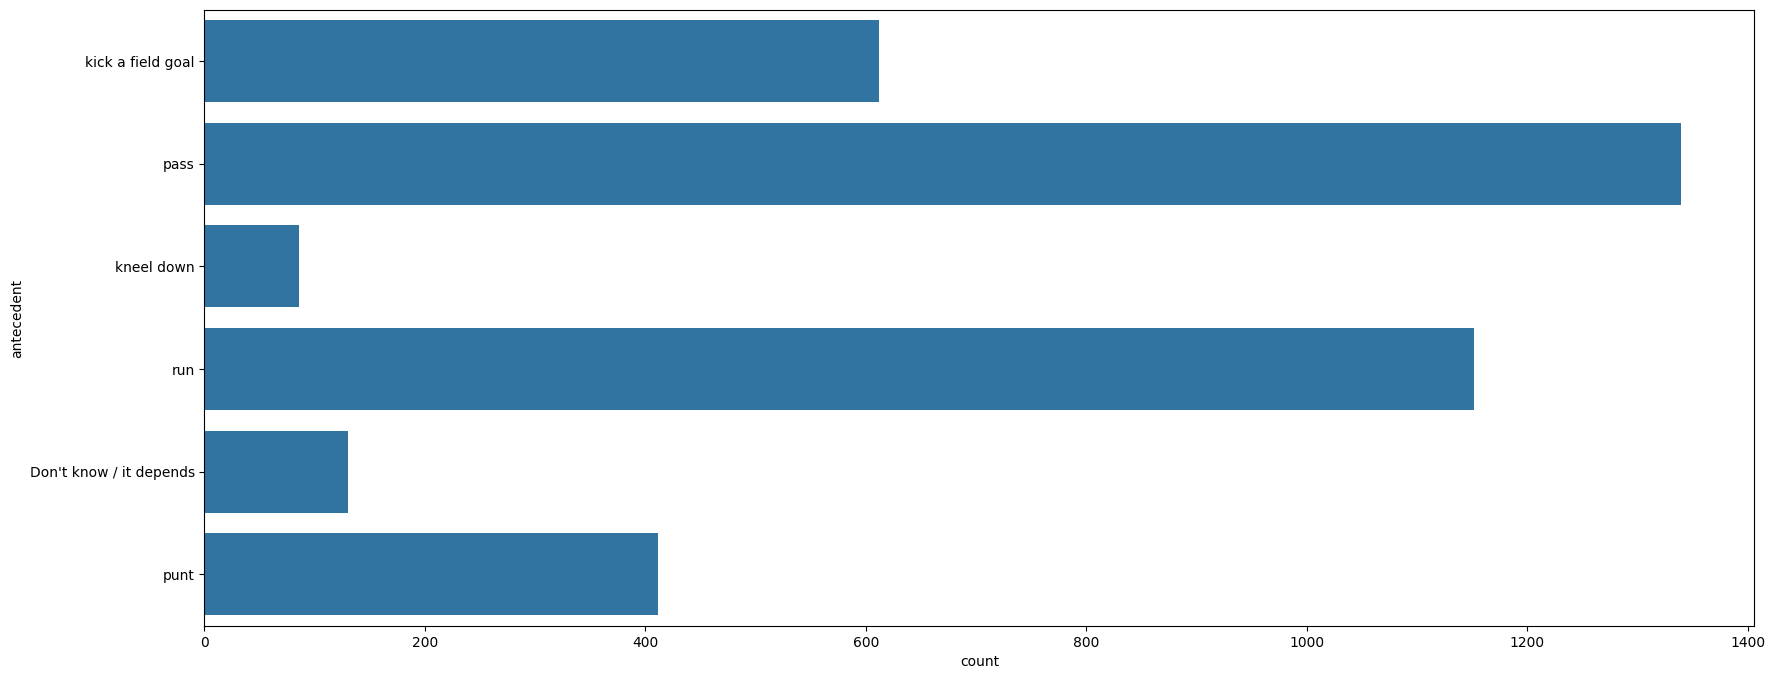

In [167]:
plt.figure(figsize=(20,8))
sns.countplot(fb['antecedent'])

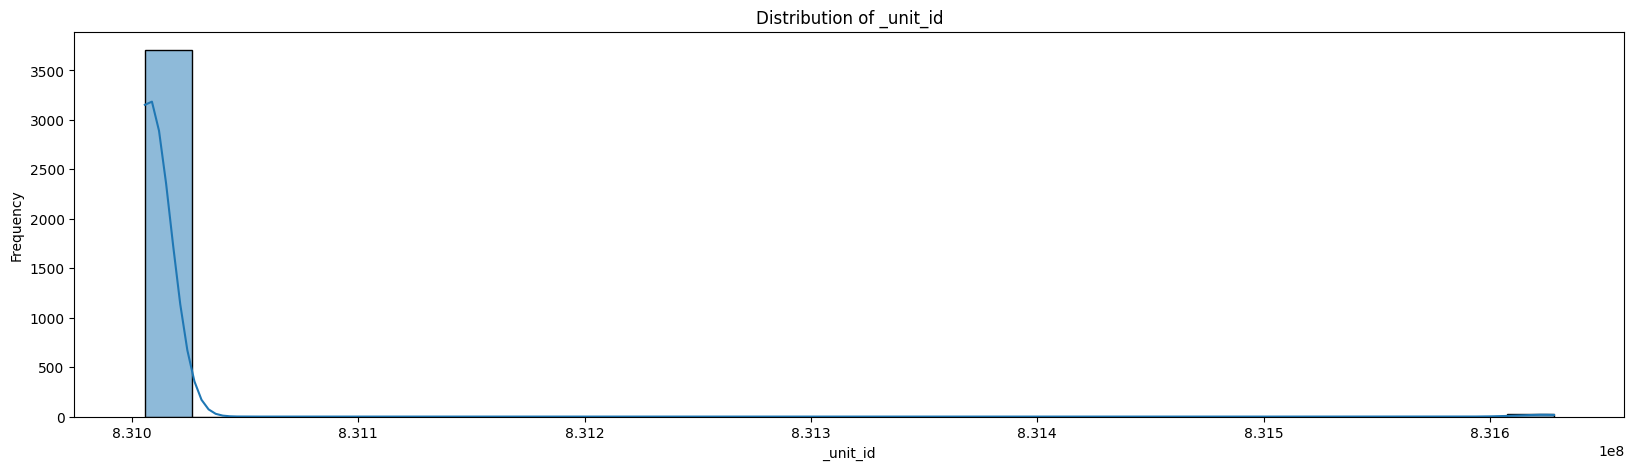

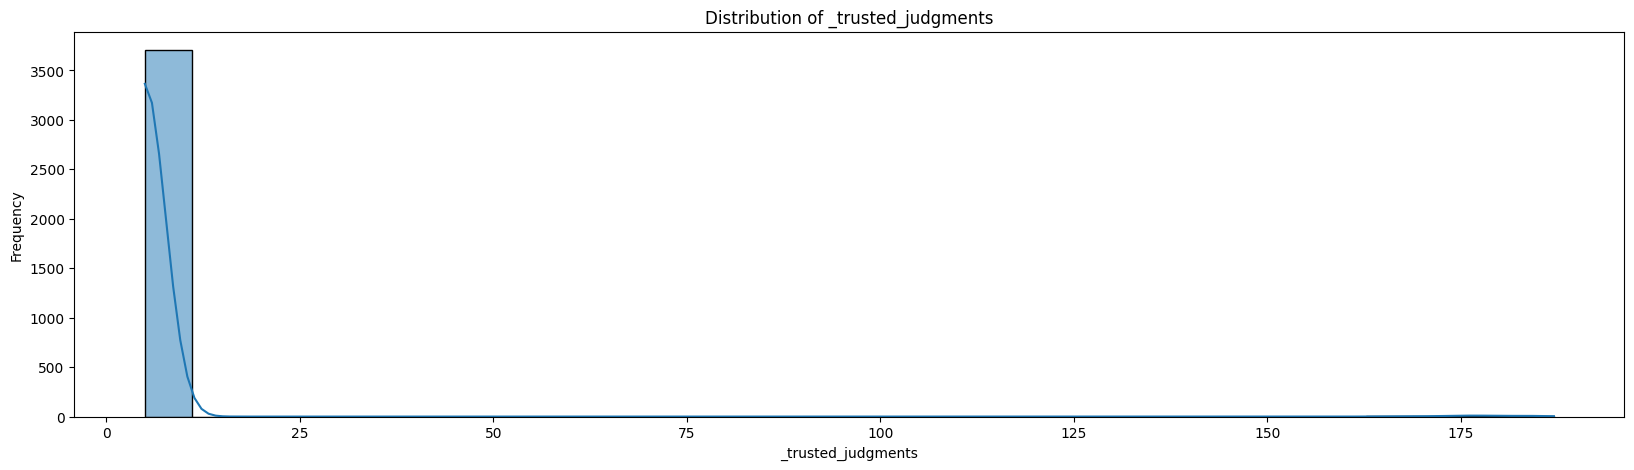

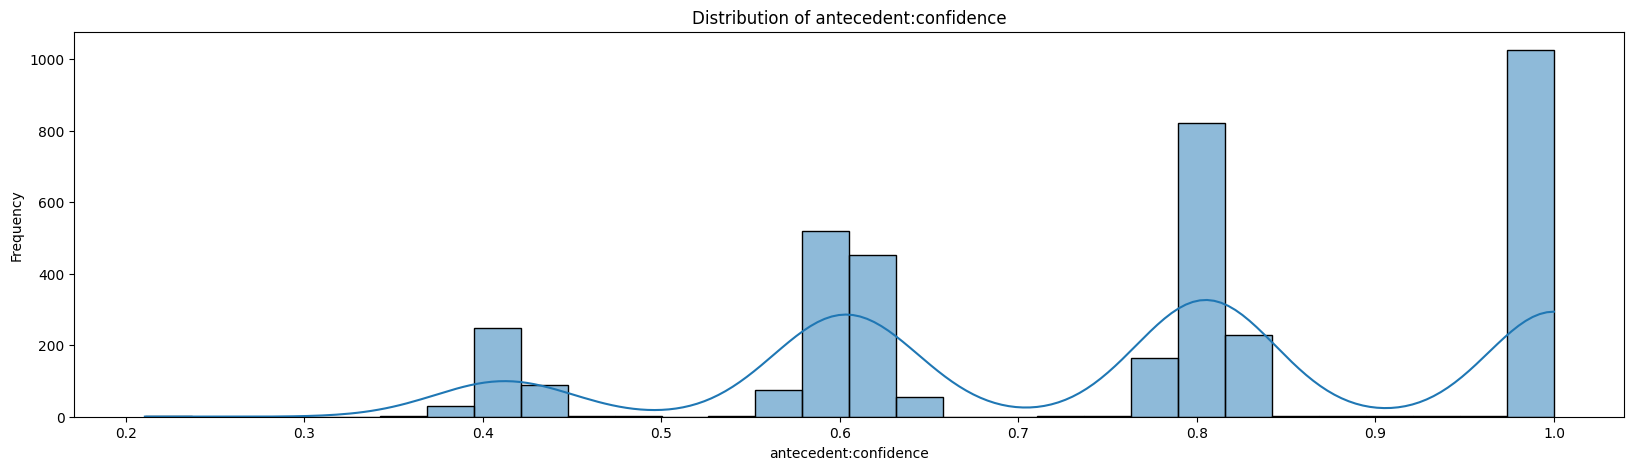

In [168]:
numeric_cols = fb.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(20,5))
    sns.histplot(fb[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

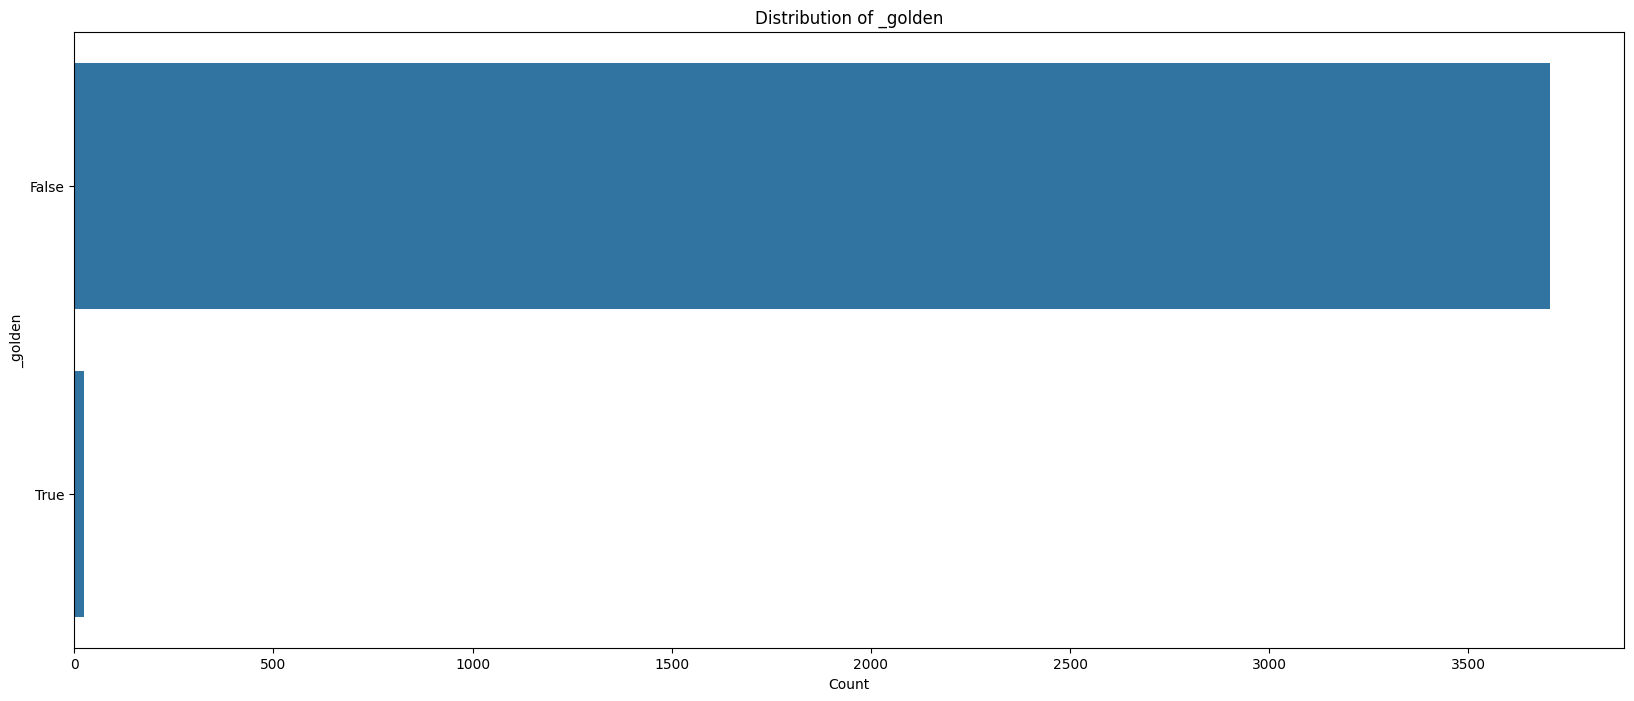

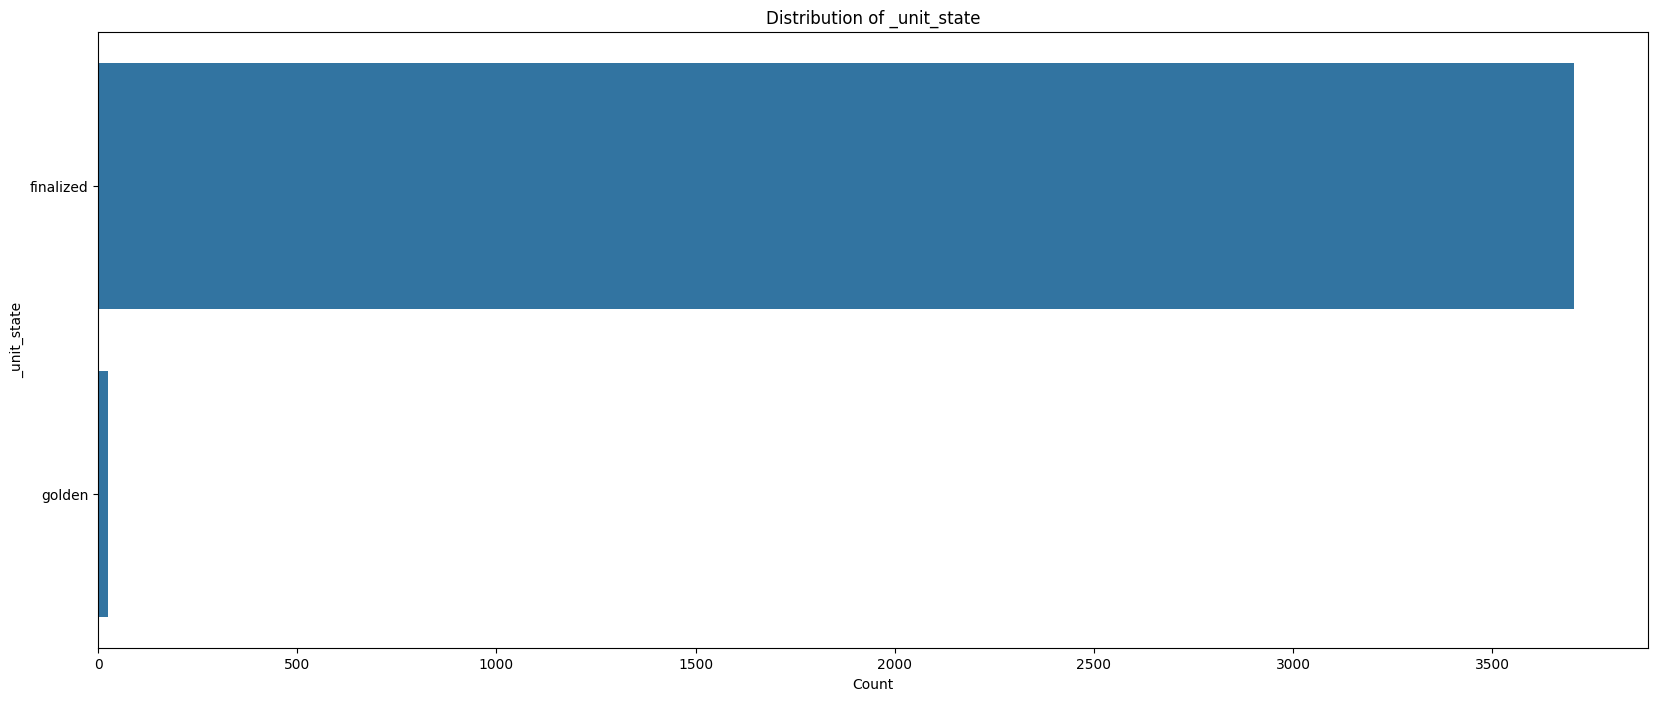

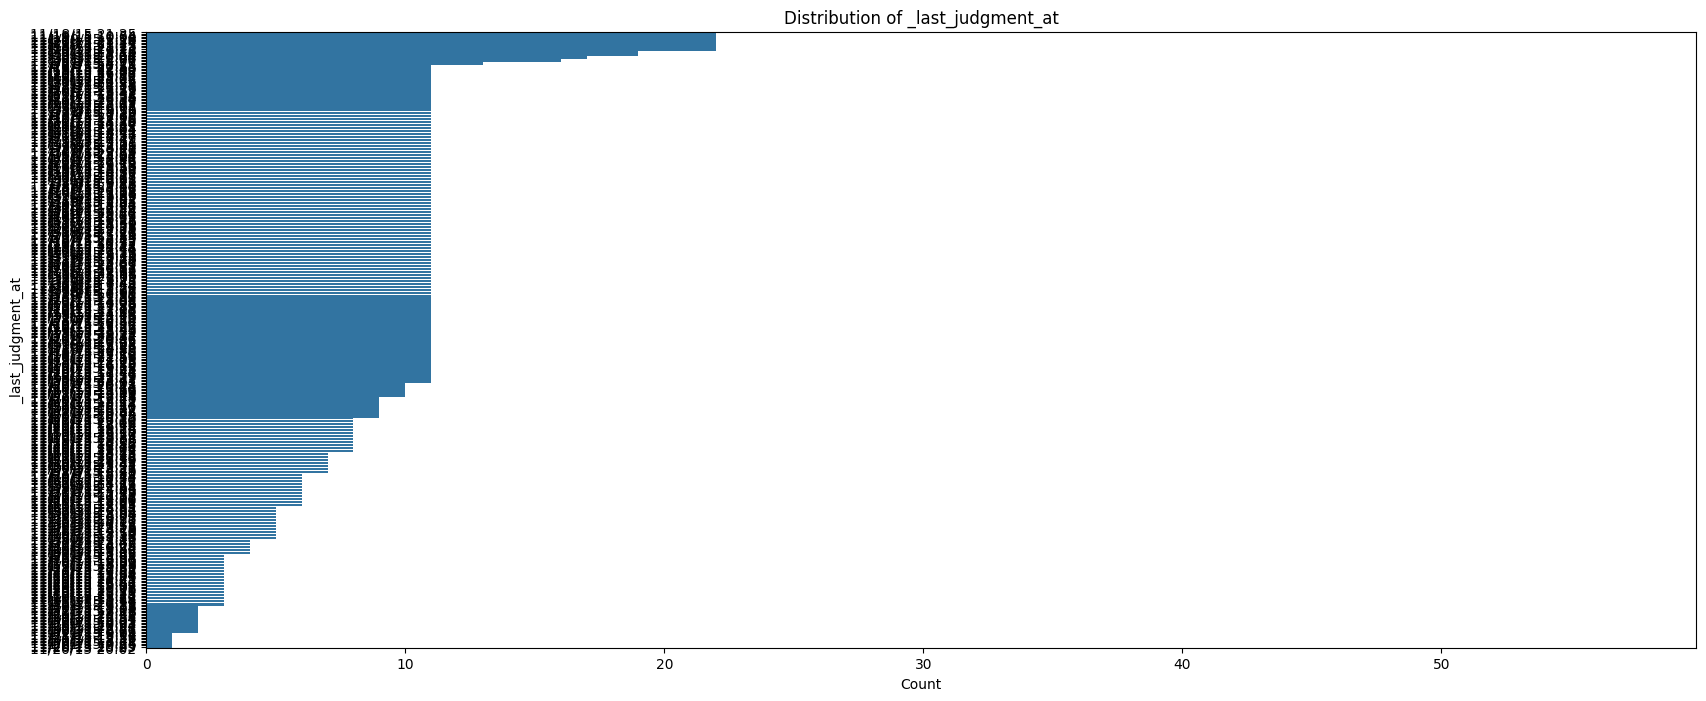

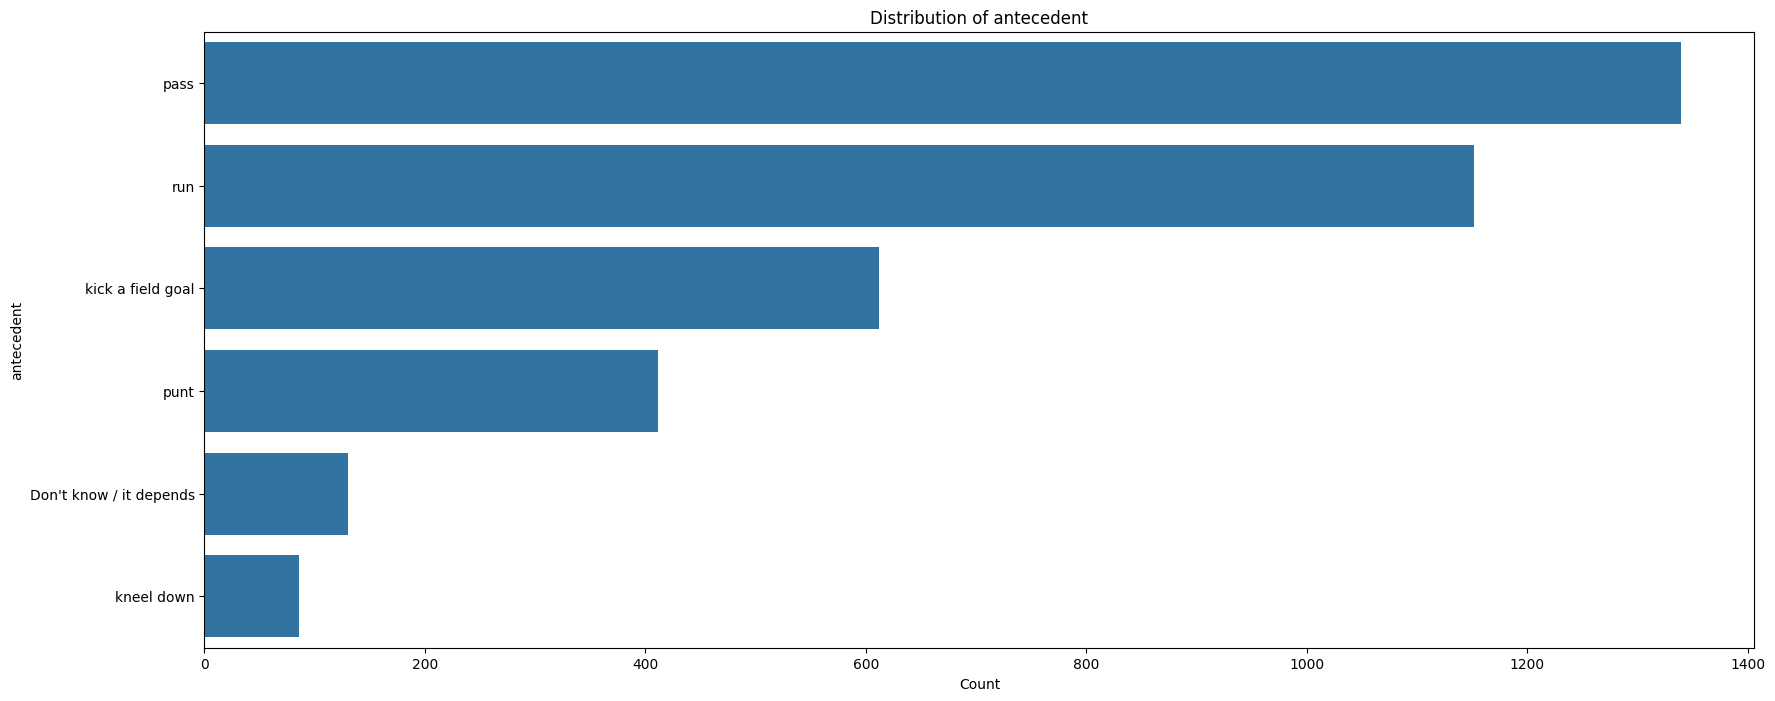

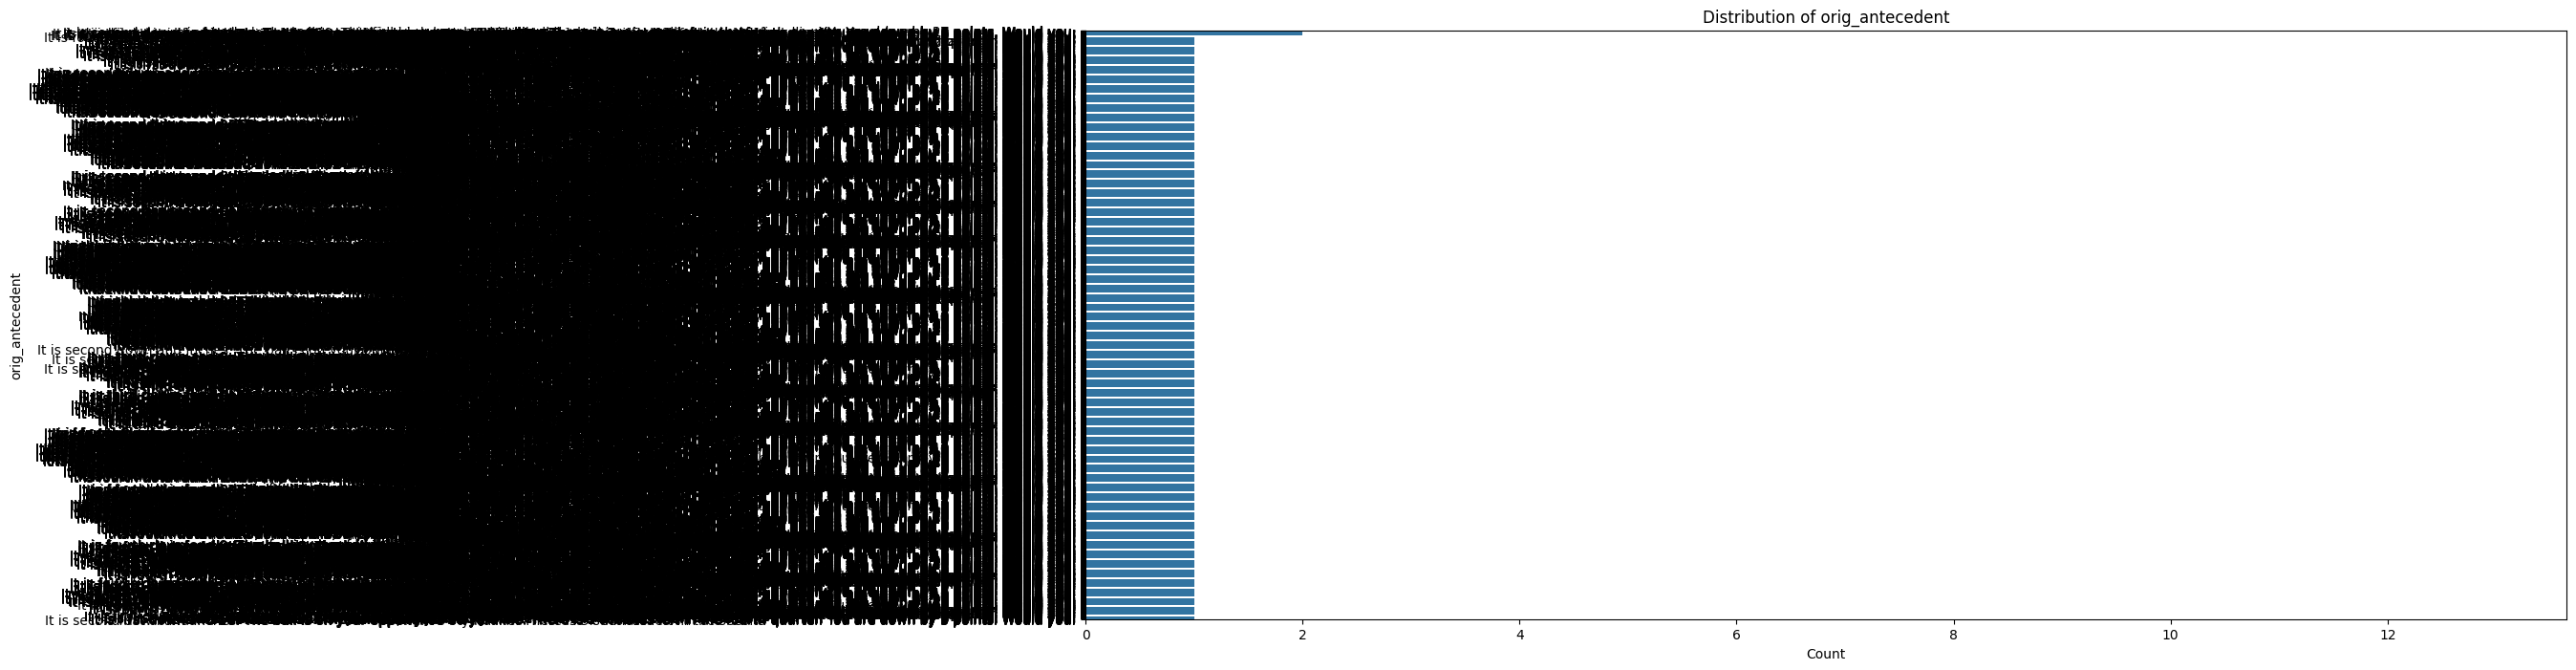

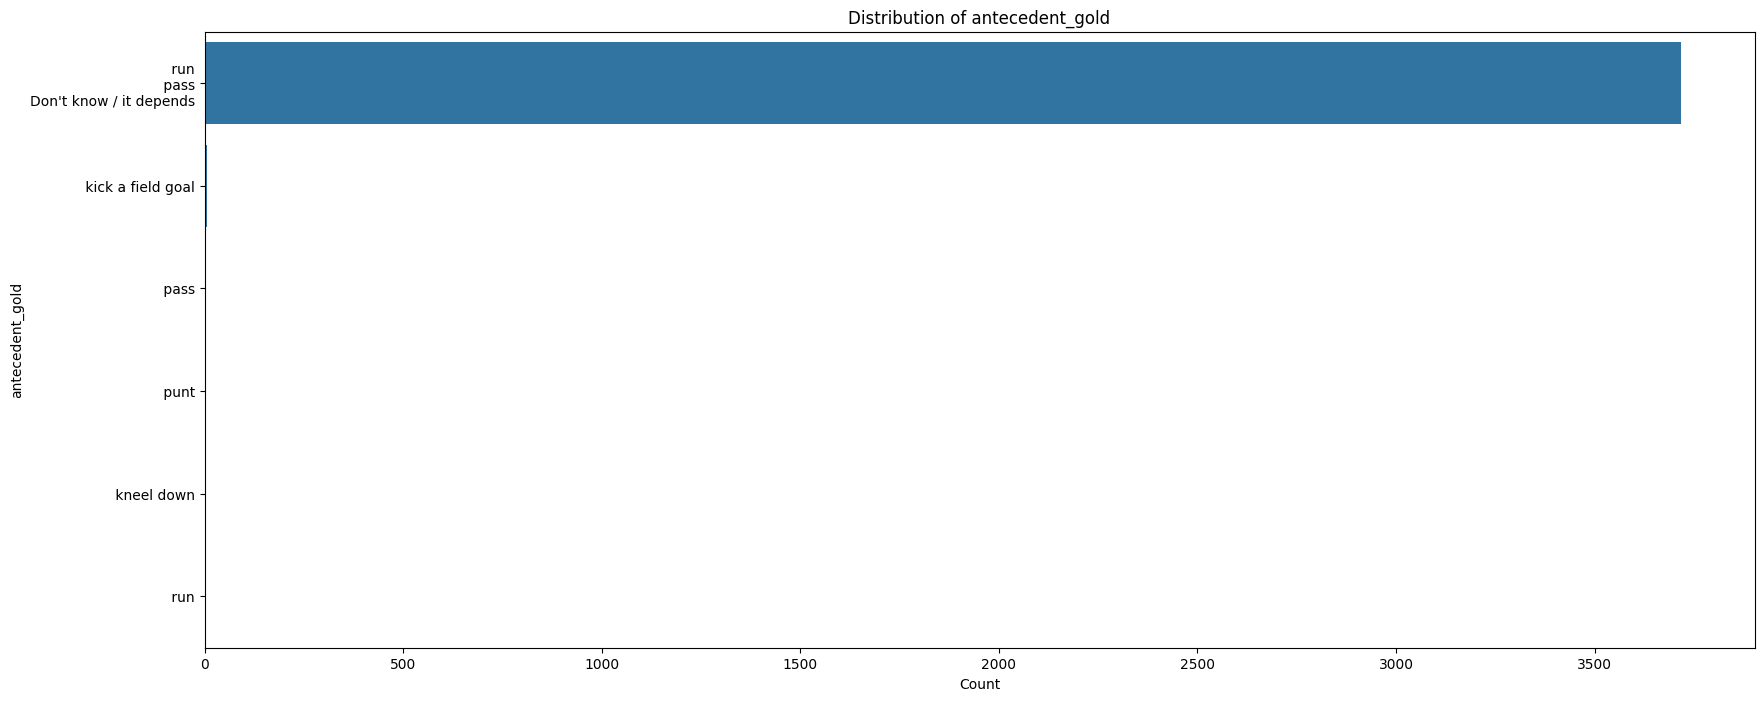

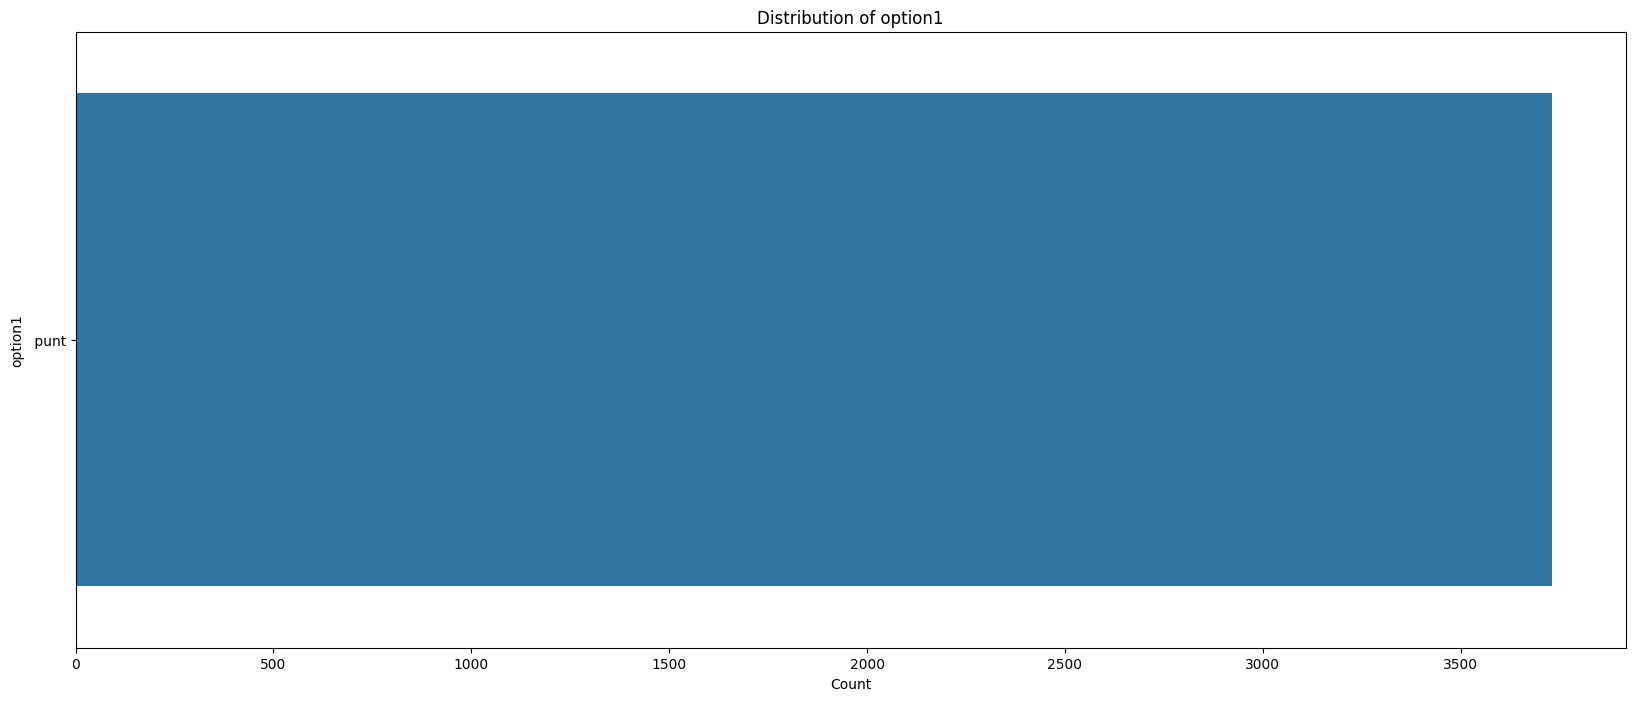

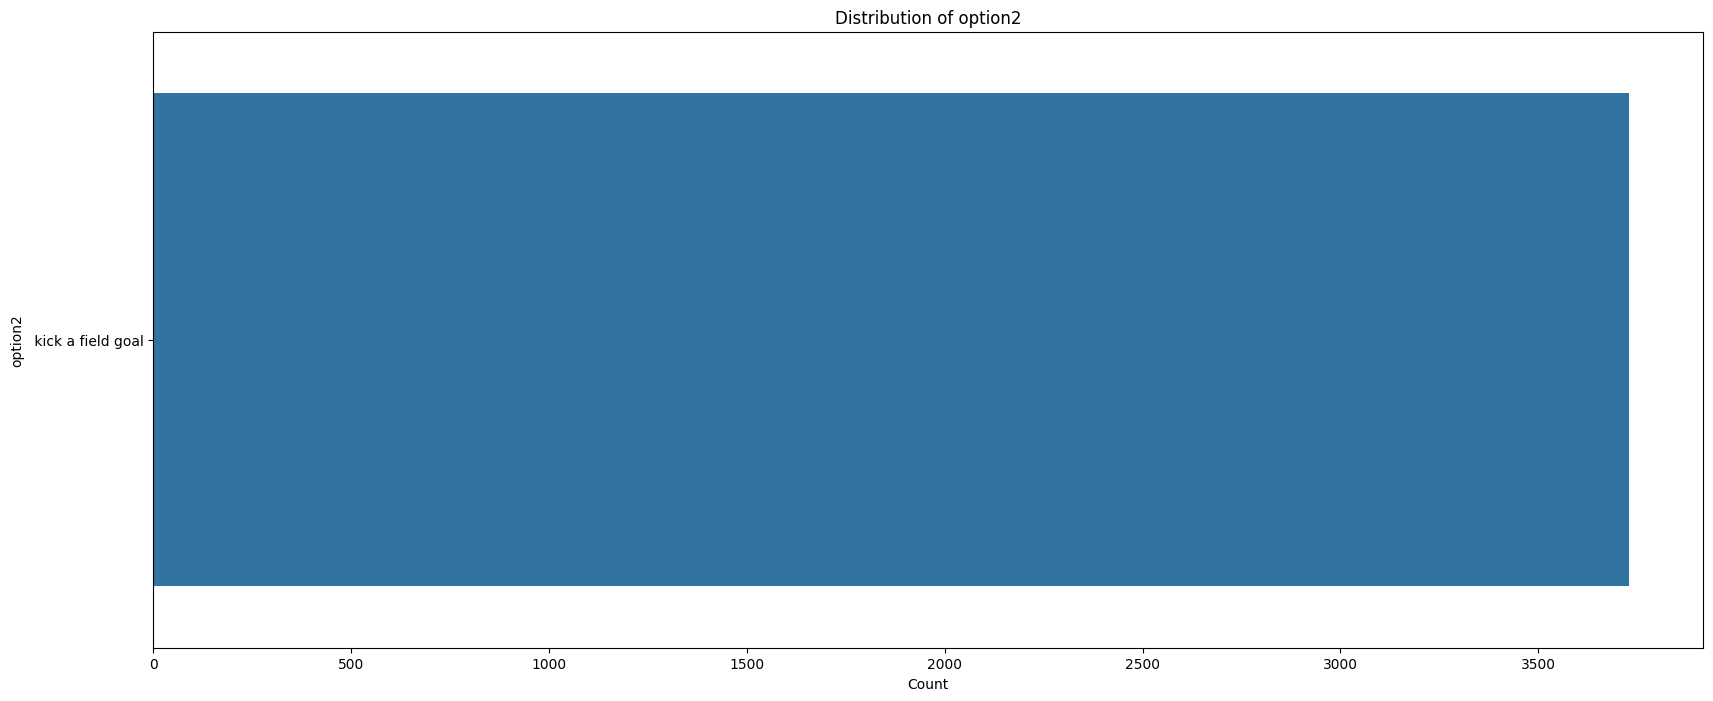

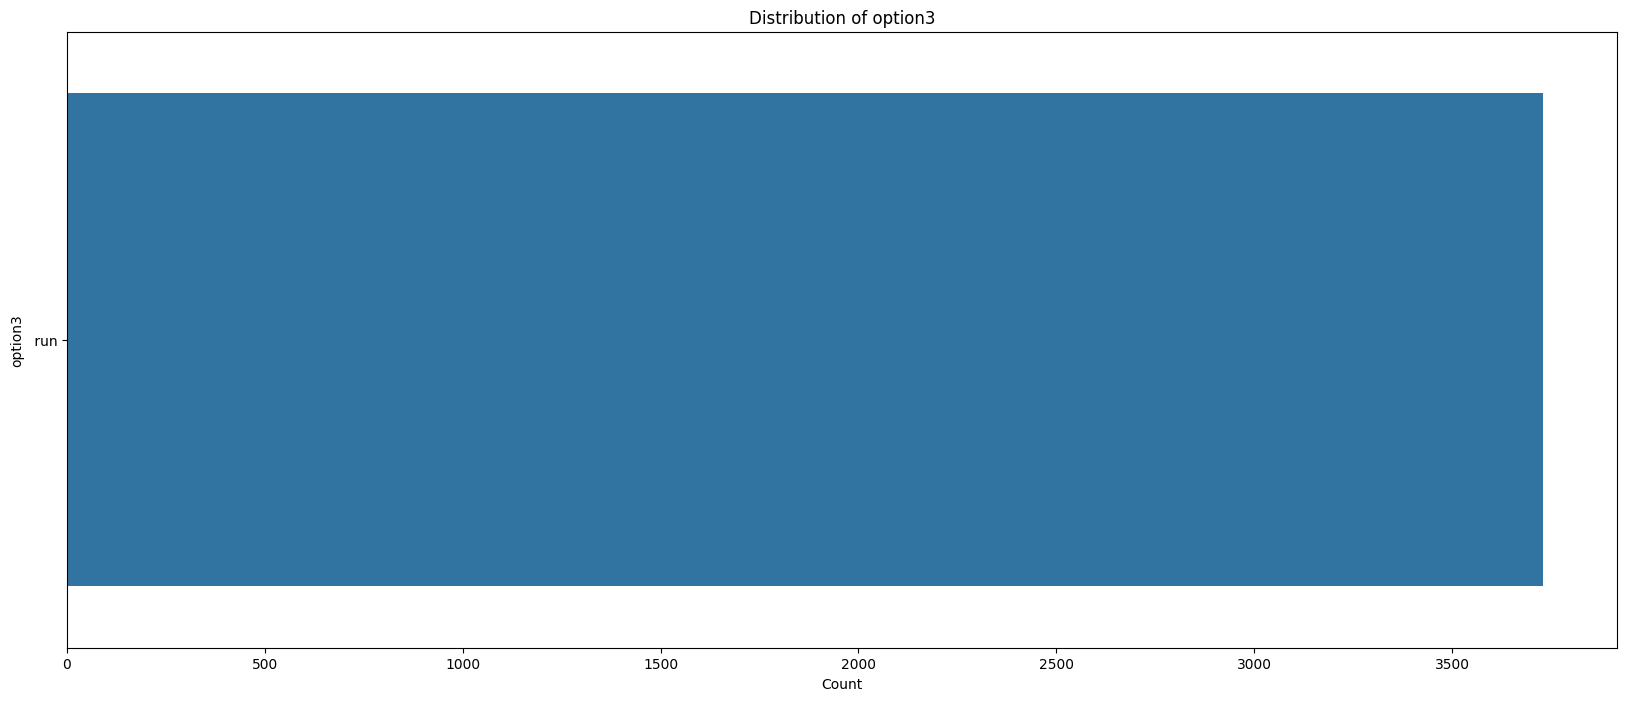

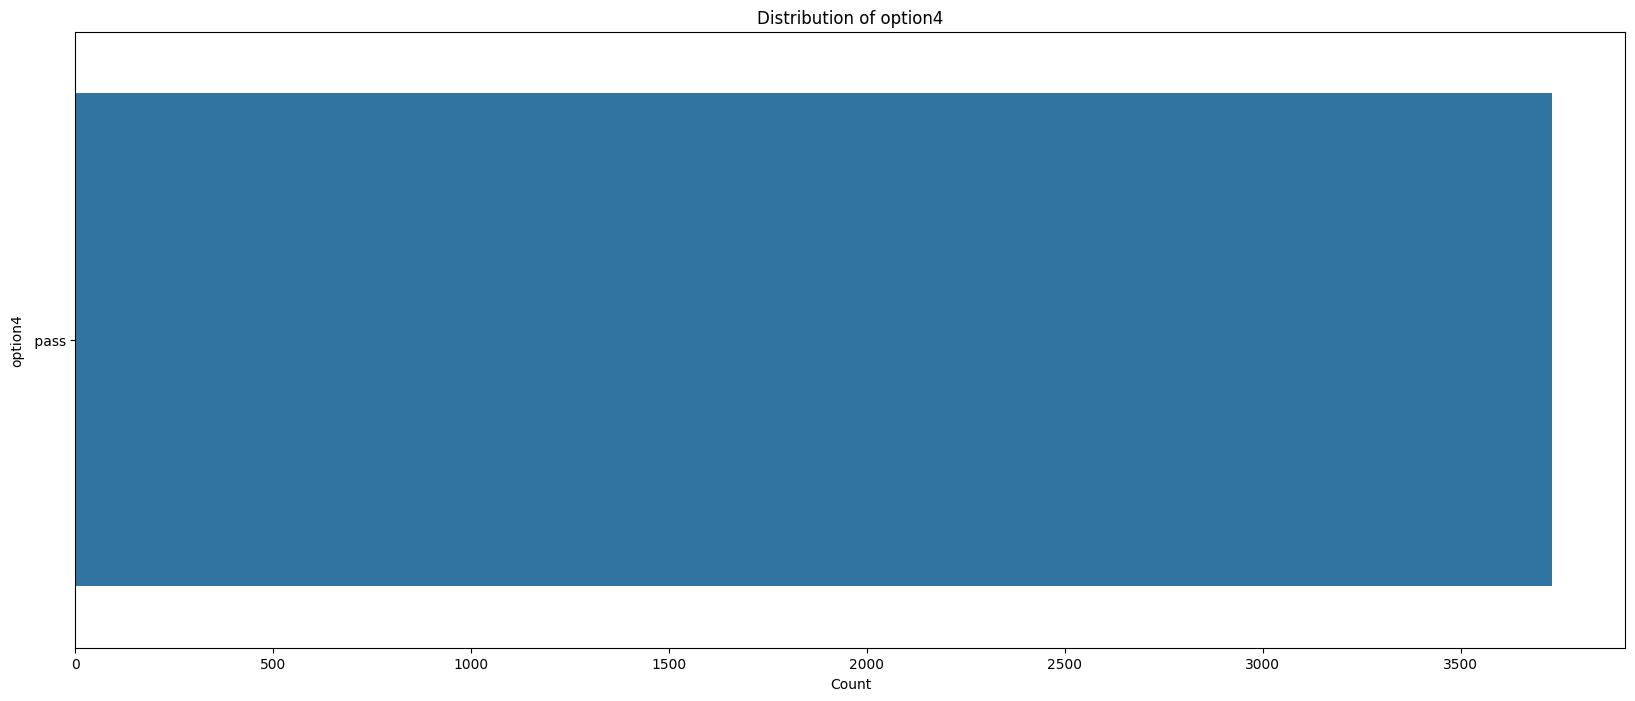

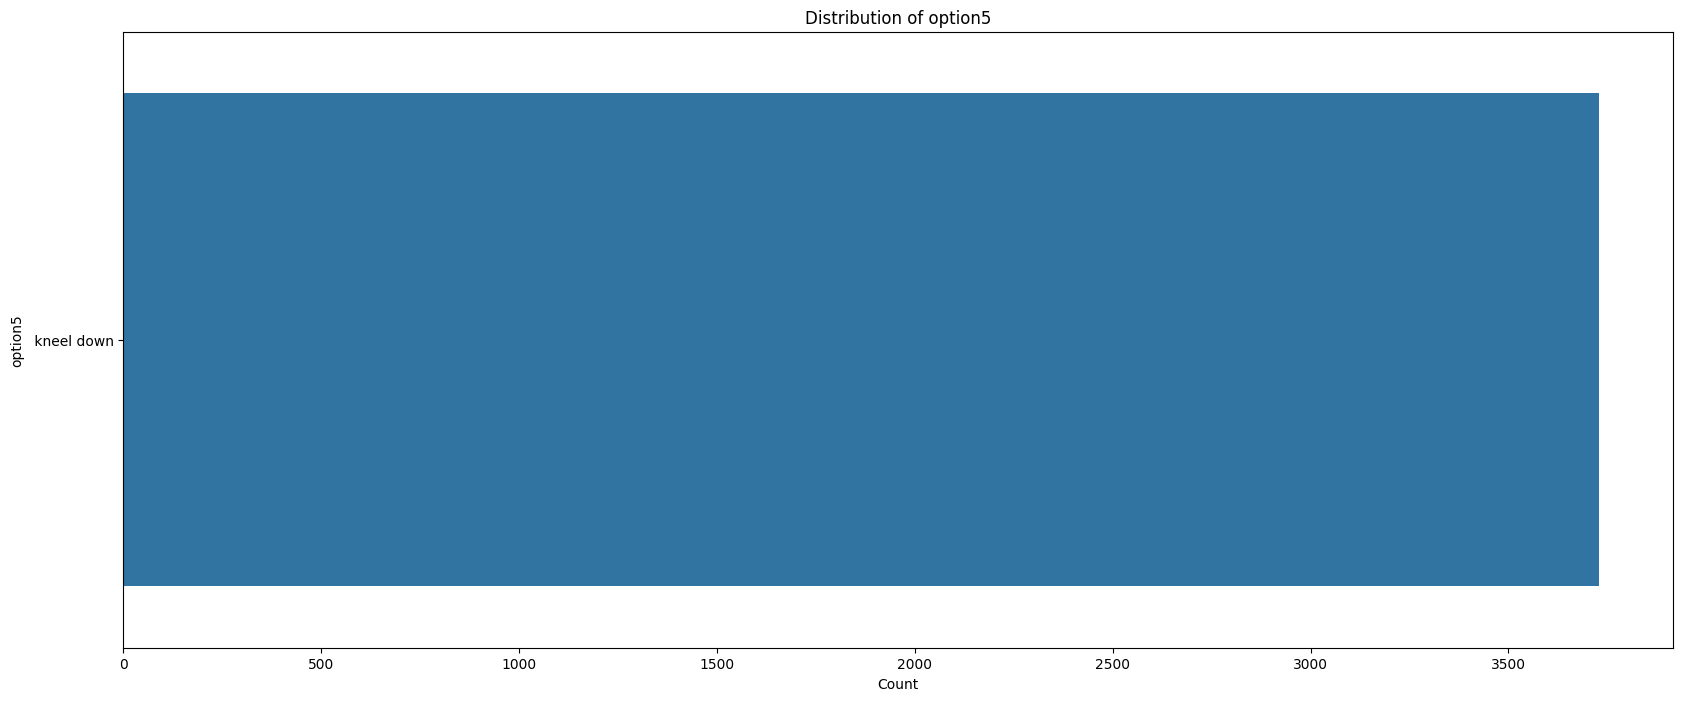

In [169]:
categorical_cols = fb.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    plt.figure(figsize=(20,8))
    sns.countplot(y=fb[col], order=fb[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

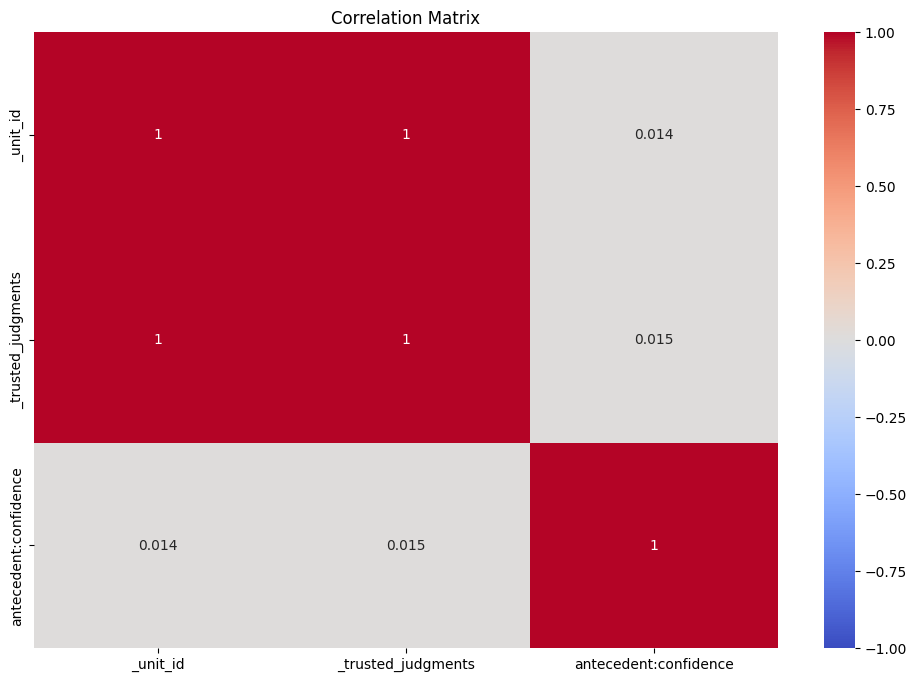

In [170]:
plt.figure(figsize=(12, 8))# Correlation matrix for numeric features
sns.heatmap(fb[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

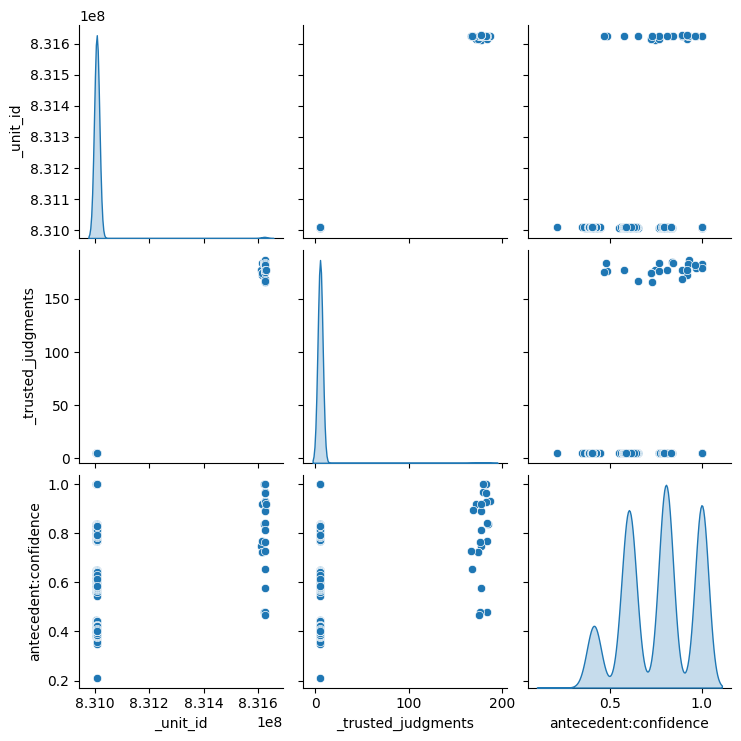

In [171]:
# Pairplot for selected numerical features
selected_numeric_cols = numeric_cols[:4]  # Select first 4 numerical columns for example

sns.pairplot(fb[selected_numeric_cols], diag_kind='kde')
plt.show()

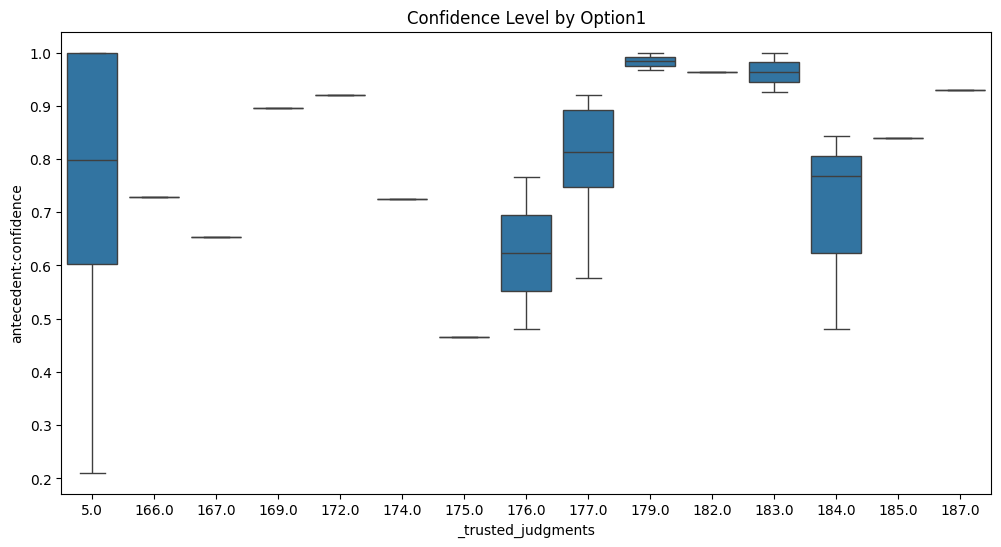

In [172]:
# Relationship between a few categorical and numerical feature
plt.figure(figsize=(12, 6))
sns.boxplot(x='_trusted_judgments', y='antecedent:confidence', data=fb)
plt.title('Confidence Level by Option1')
plt.xlabel('_trusted_judgments')
plt.ylabel('antecedent:confidence')
plt.show()

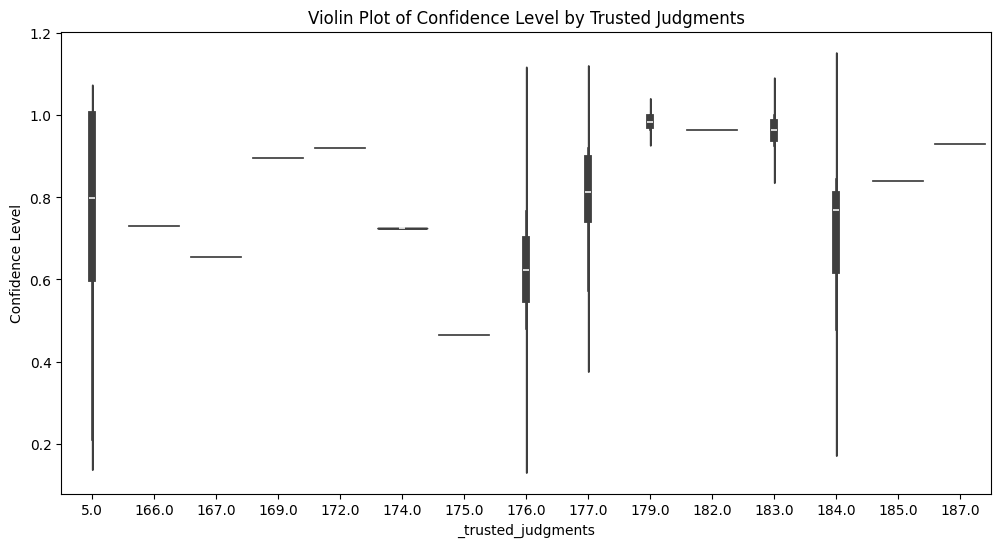

In [173]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='_trusted_judgments', y='antecedent:confidence', data=fb)
plt.title('Violin Plot of Confidence Level by Trusted Judgments')
plt.xlabel('_trusted_judgments')
plt.ylabel('Confidence Level')
plt.show()

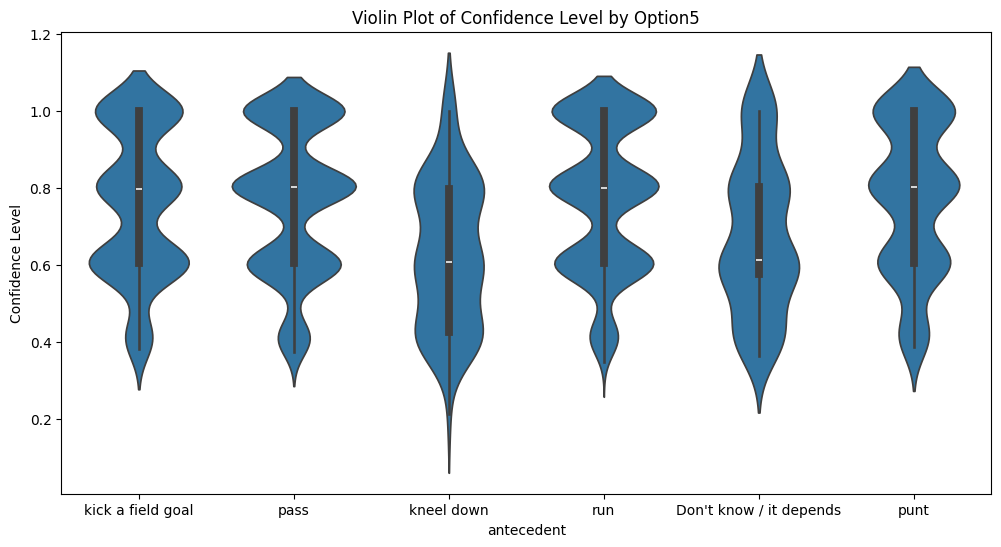

In [174]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='antecedent', y='antecedent:confidence', data=fb)
plt.title('Violin Plot of Confidence Level by Option5')
plt.xlabel('antecedent')
plt.ylabel('Confidence Level')
plt.show()

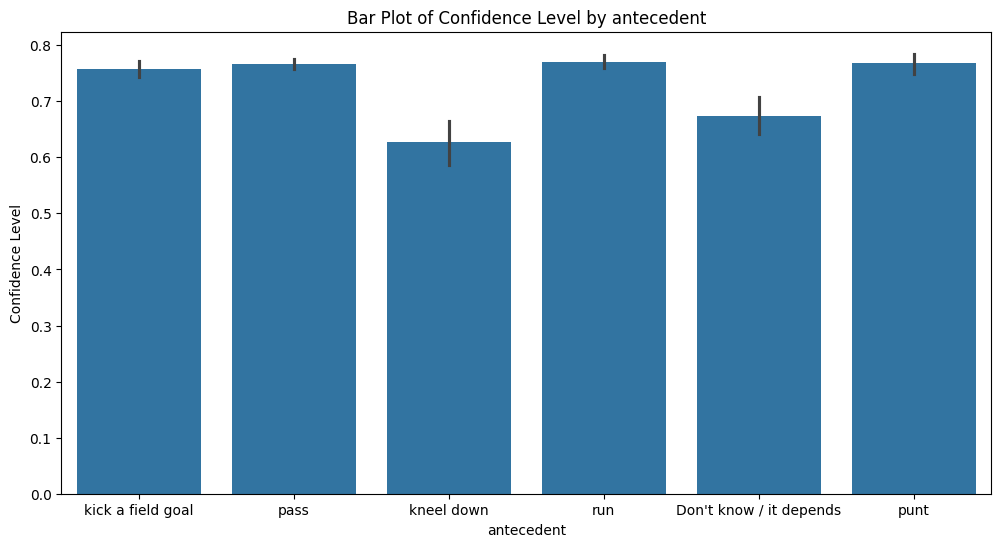

In [175]:
plt.figure(figsize=(12, 6))
sns.barplot(x='antecedent', y='antecedent:confidence', data=fb)
plt.title('Bar Plot of Confidence Level by antecedent')
plt.xlabel('antecedent')
plt.ylabel('Confidence Level')
plt.show()

In [200]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
encoder = LabelEncoder()

# Target columns to be predicted
target_columns = ['option1', 'option2', 'option3', 'option4', 'option5']
for col in target_columns:
    fb[col] = encoder.fit_transform(fb[col])

# Feature column to predict
fb['antecedent_gold'] = encoder.fit_transform(fb['antecedent_gold'])

# Prepare features (X) and target (y)
X = fb[target_columns]
y = fb['antecedent_gold']

In [196]:
print(X)

      option1  option2  option3  option4  option5
0           0        0        0        0        0
1           0        0        0        0        0
2           0        0        0        0        0
3           0        0        0        0        0
4           0        0        0        0        0
...       ...      ...      ...      ...      ...
3725        0        0        0        0        0
3726        0        0        0        0        0
3727        0        0        0        0        0
3728        0        0        0        0        0
3729        0        0        0        0        0

[3730 rows x 5 columns]


In [185]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()# postpruning
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [187]:
# Make predictions on the test set
y_pred =treemodel.predict(X_test)

[Text(0.5, 0.5, 'gini = 0.006\nsamples = 2984\nvalue = [3, 1, 2, 2, 1, 2975]')]

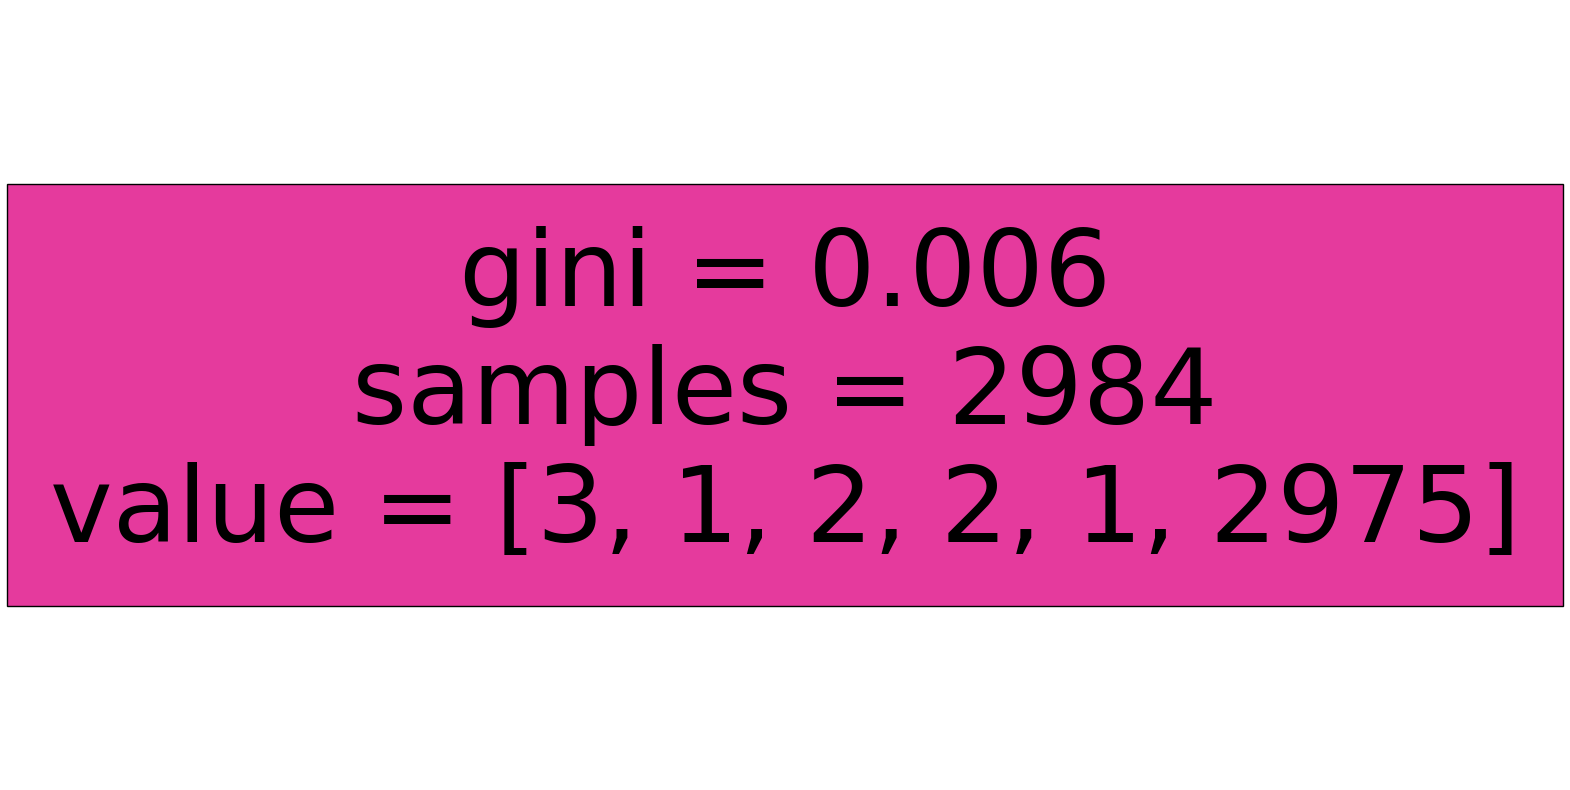

In [188]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(treemodel,filled=True)

In [189]:
# Make predictions on the test set
y_pred = treemodel.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.9946380697050938


In [193]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           5       1.00      0.99      1.00       746

    accuracy                           0.99       746
   macro avg       0.33      0.33      0.33       746
weighted avg       1.00      0.99      1.00       746



c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita